In [1]:
from skimage import io, morphology, color, util, filters
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", palette="Set2")

data = "example/"

In [2]:
img  = io.imread(data + '1_fluorescence.jpg')
img_true  = io.imread(data + '1_brightfield.jpg')

img.shape

(5733, 3893, 3)

In [3]:
#img_gray = color.rgb2gray(img)
img_gray = img[:,:,2]

img_gray = util.img_as_ubyte(img_gray)
img_gray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

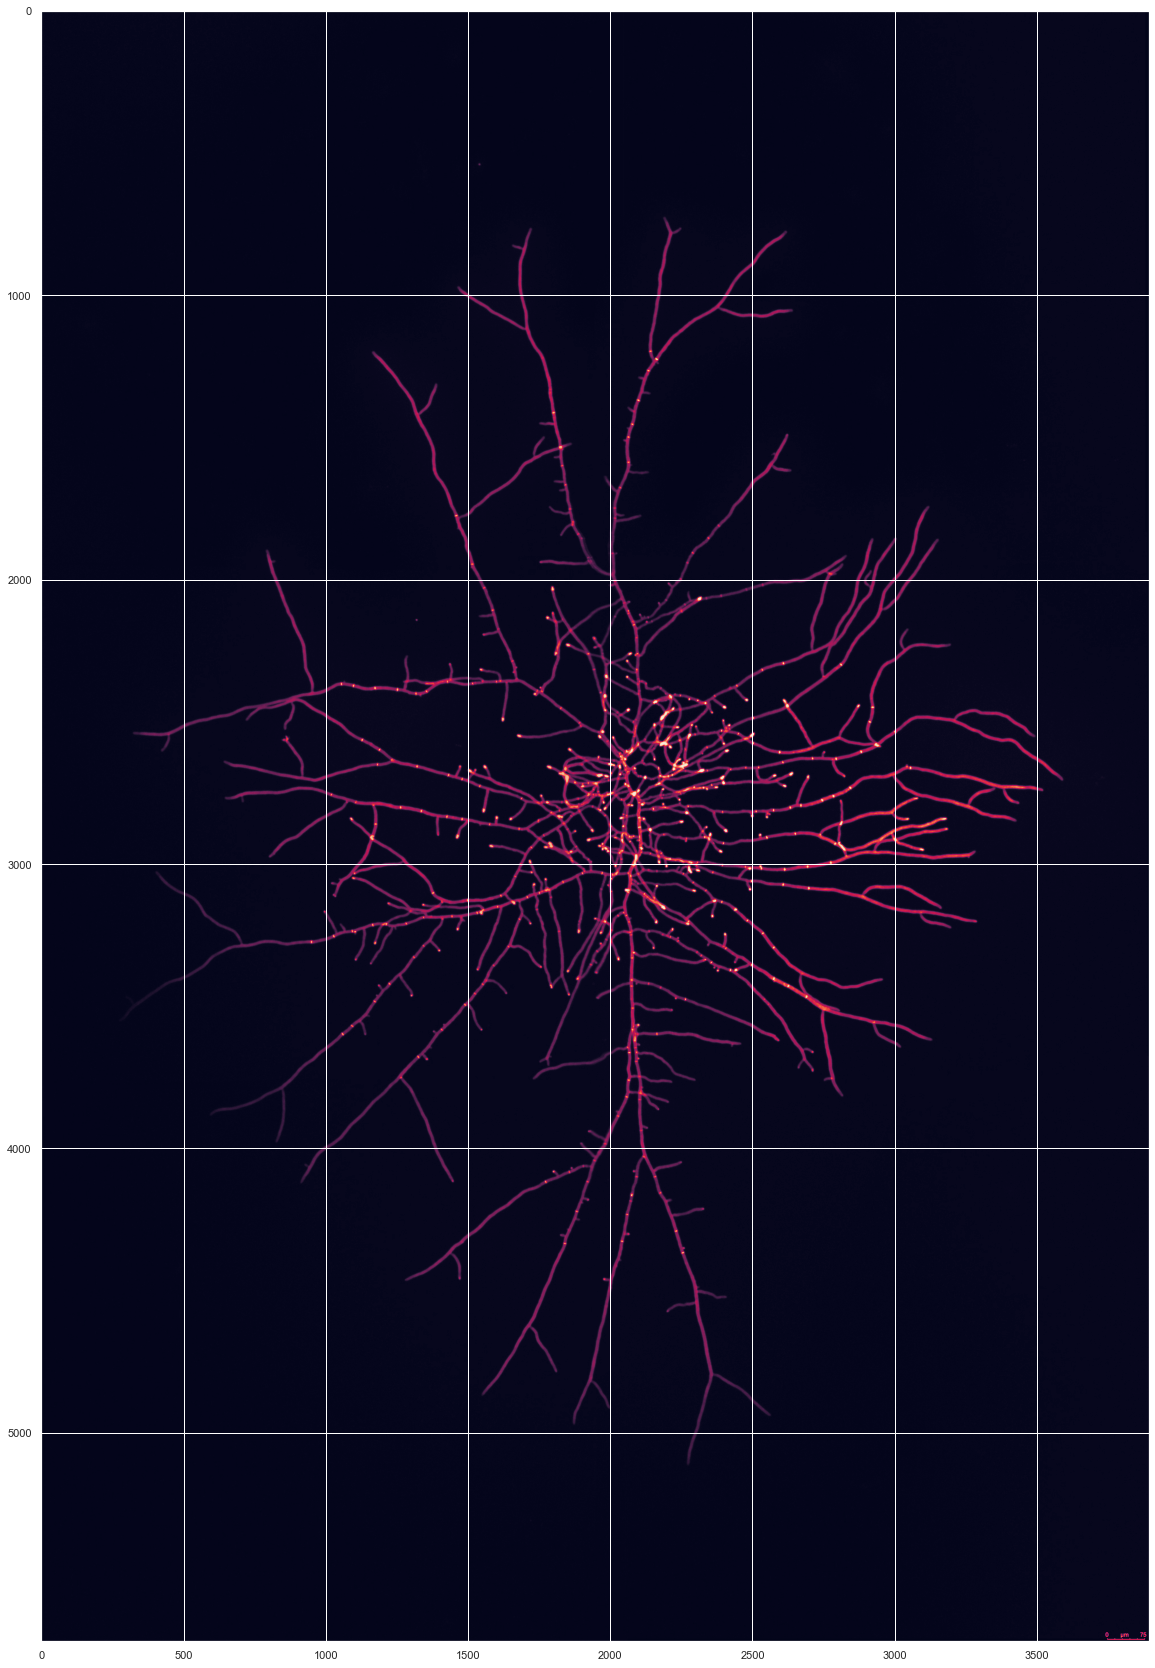

In [4]:
plt.figure(figsize=[40,30])
plt.imshow(img_gray)

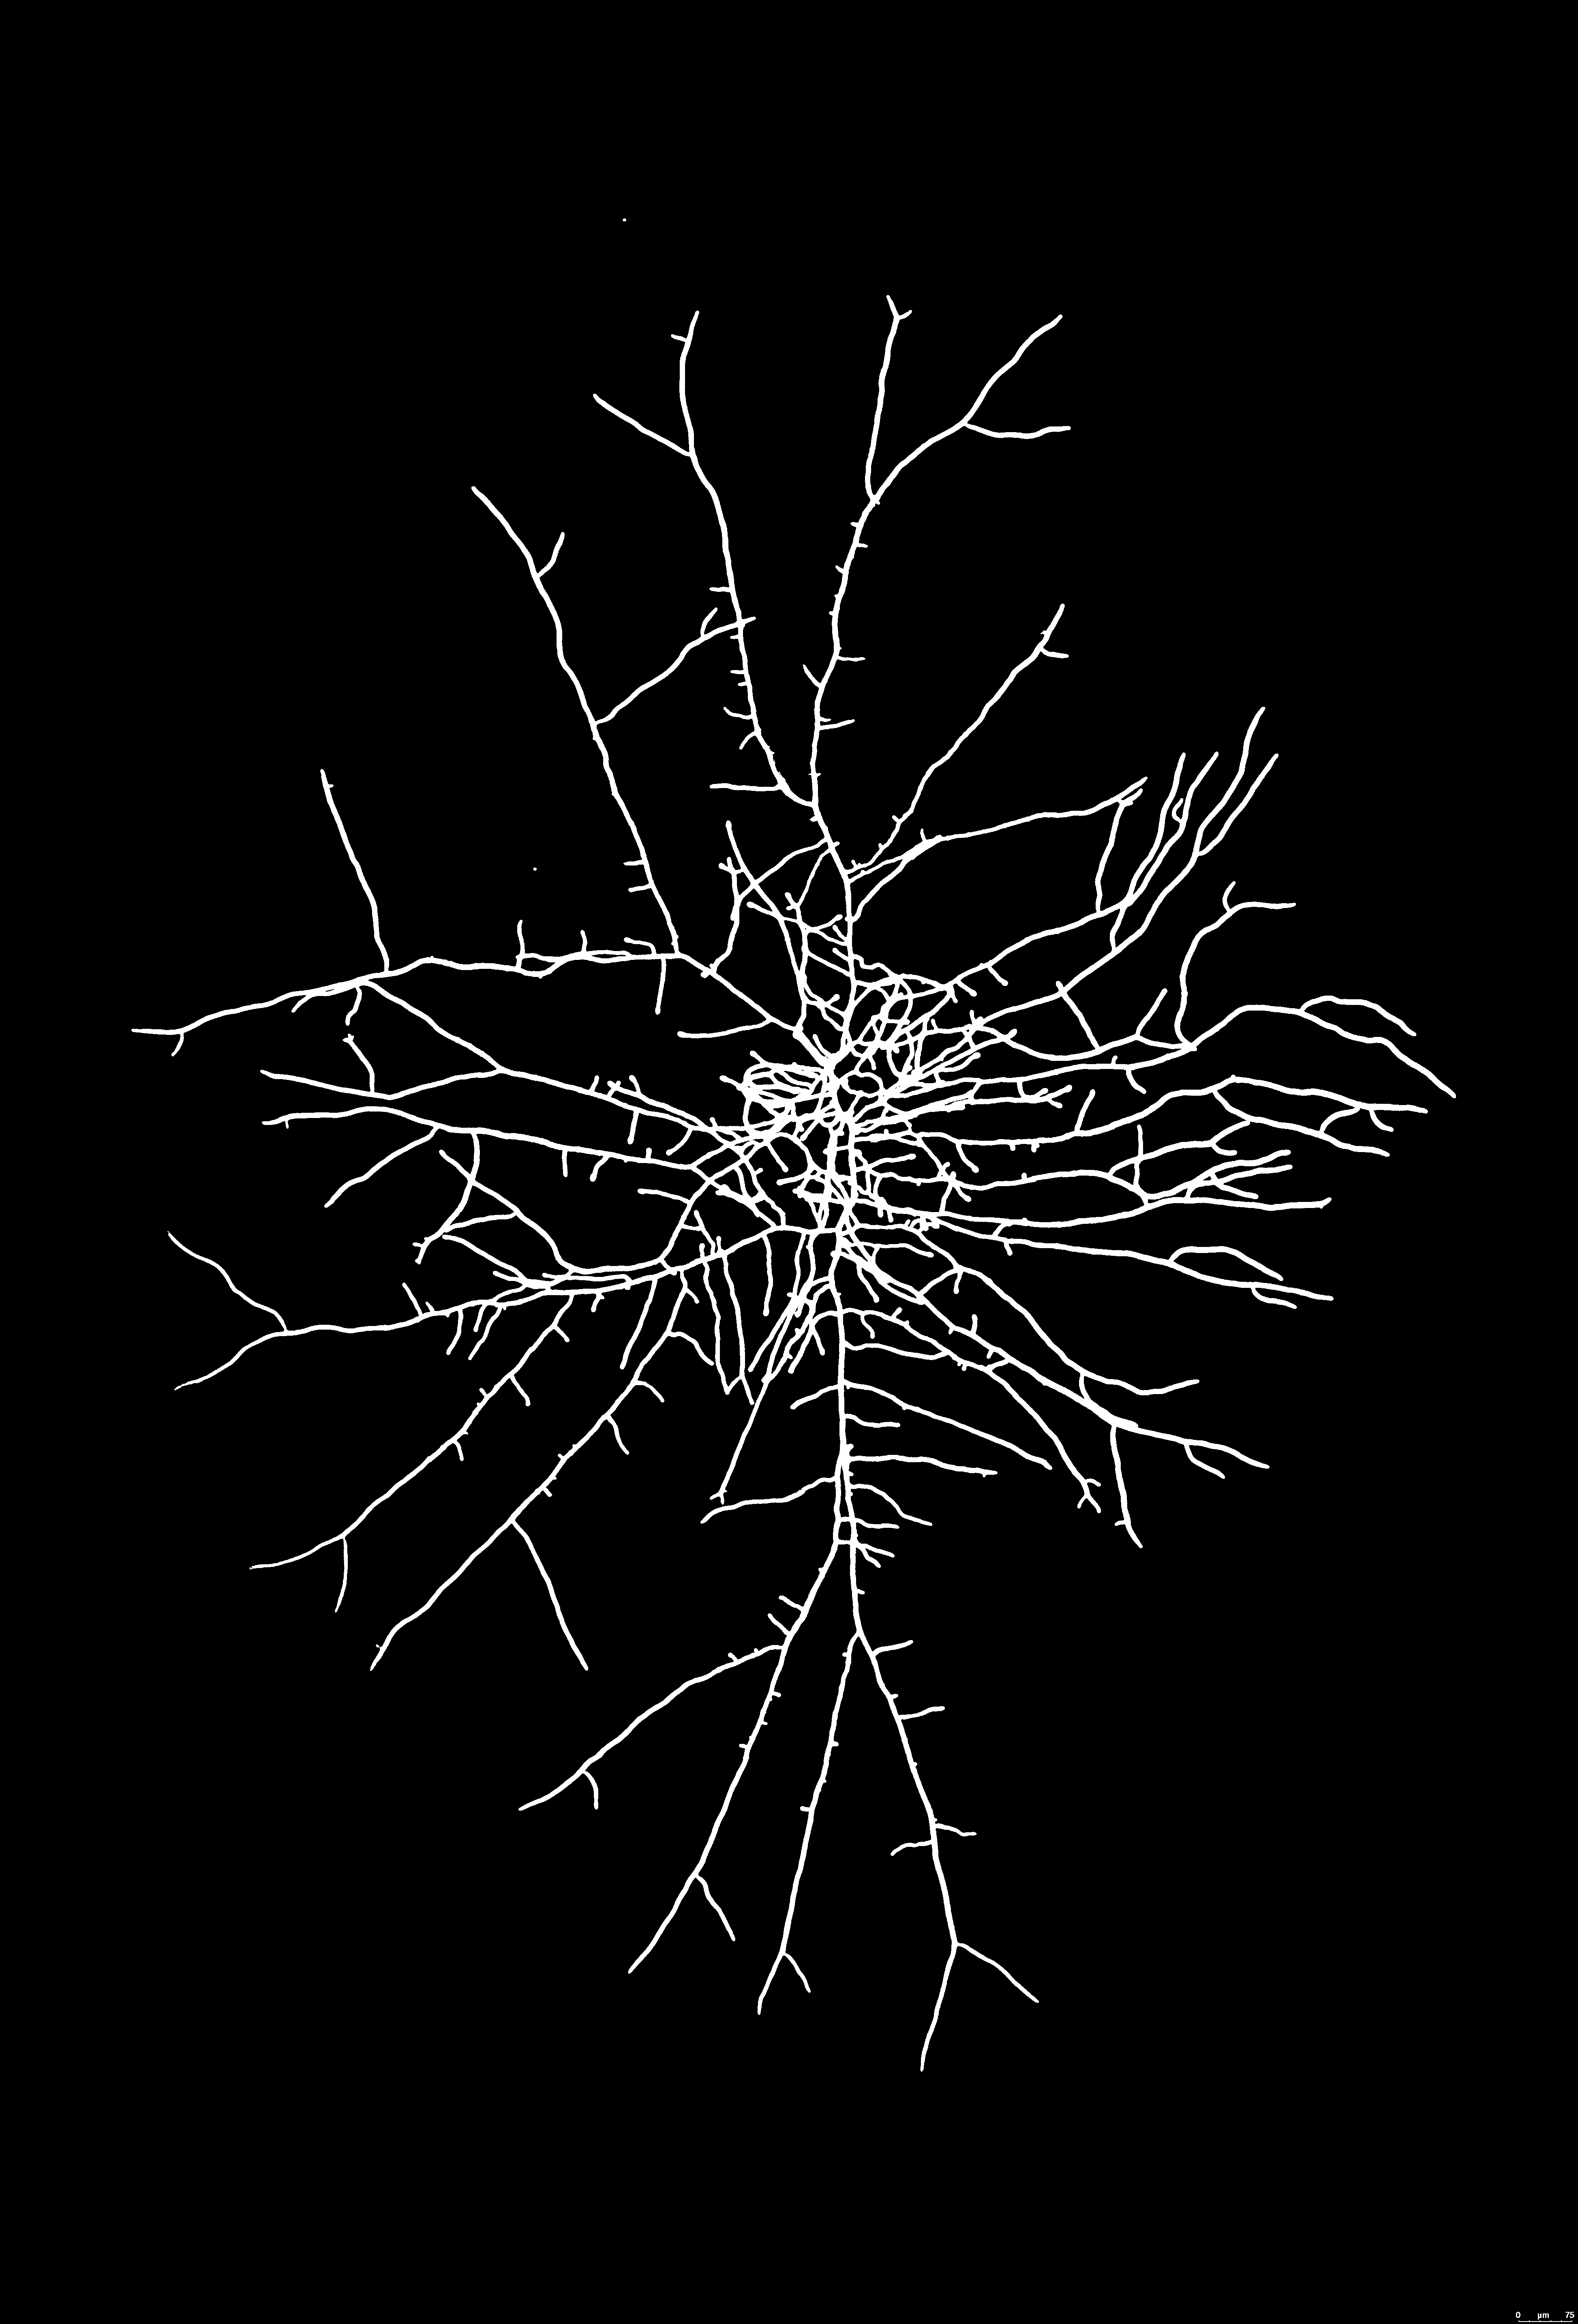

In [10]:
threshold = 25

img_binarized = img_gray.copy()
img_binarized[img_binarized >= threshold] = 255
img_binarized[img_binarized < threshold] = 0

#plt.figure(figsize=[15,15])
#plt.imshow(img_binarized)

img_binarized = Image.fromarray(img_binarized).convert("1")

clean_binary_img = morphology.remove_small_objects(np.array(img_binarized), min_size=50)
Image.fromarray(clean_binary_img)

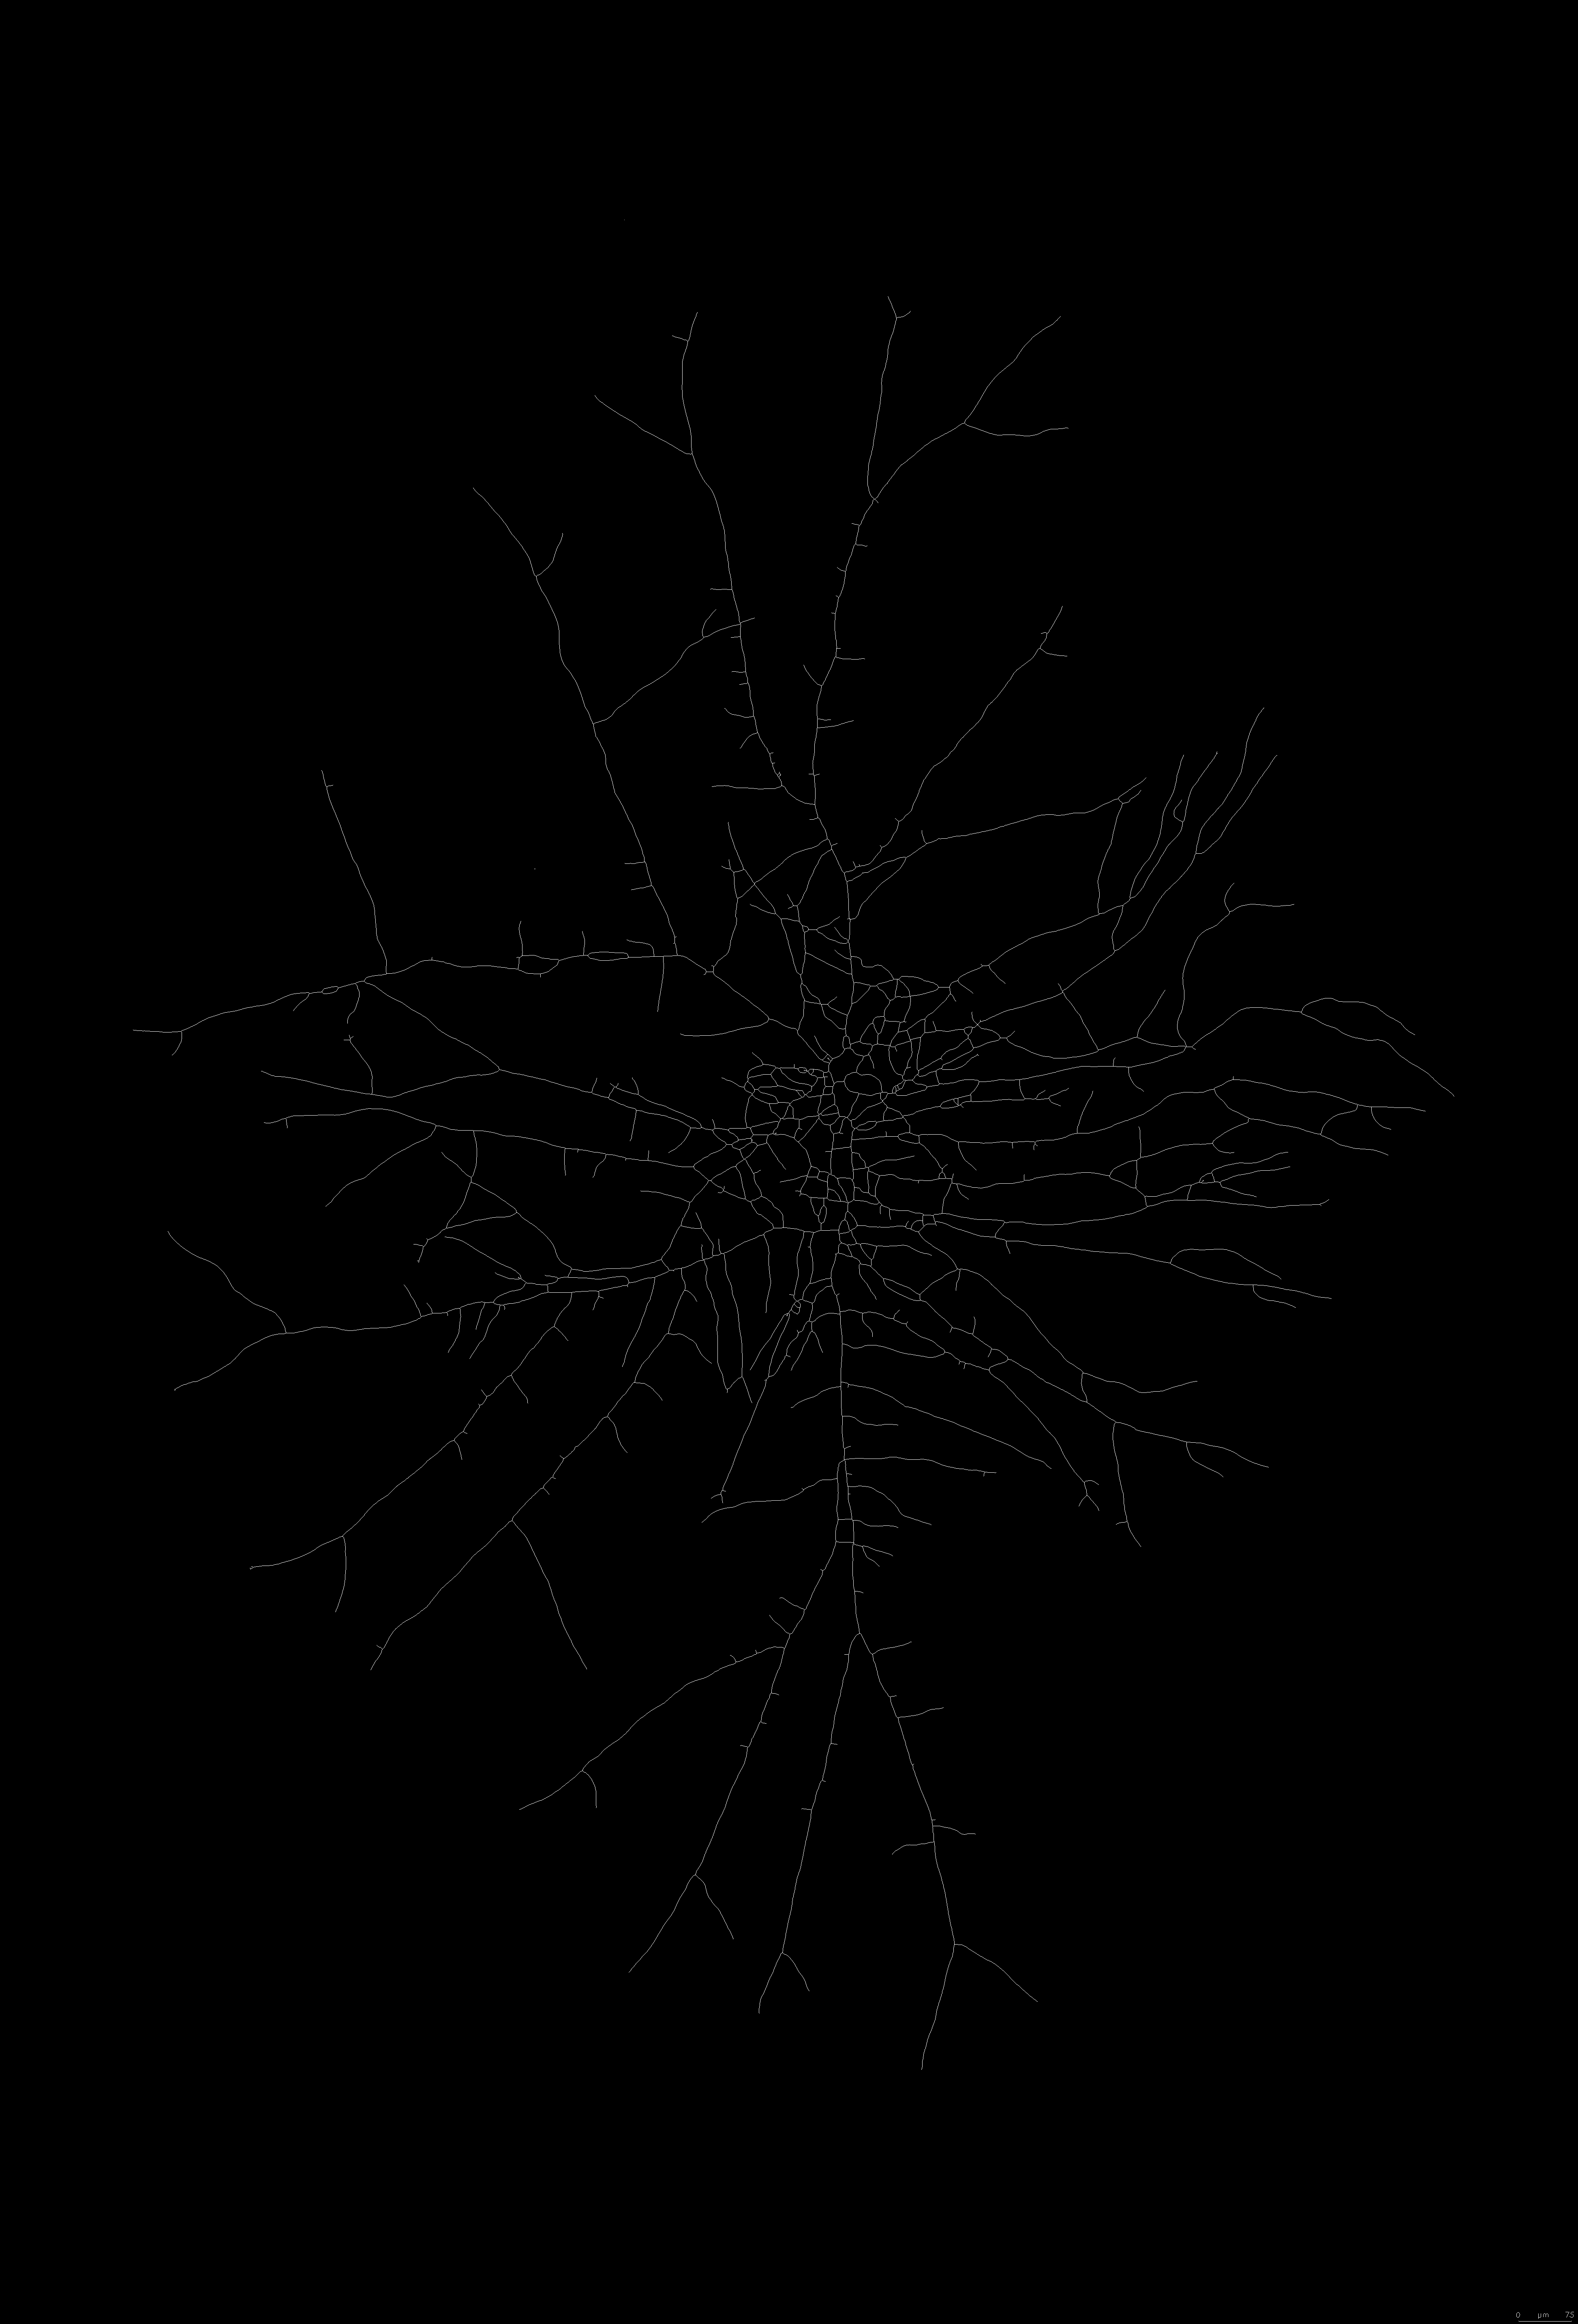

In [12]:
skeleton = morphology.skeletonize(clean_binary_img)

Image.fromarray(skeleton)


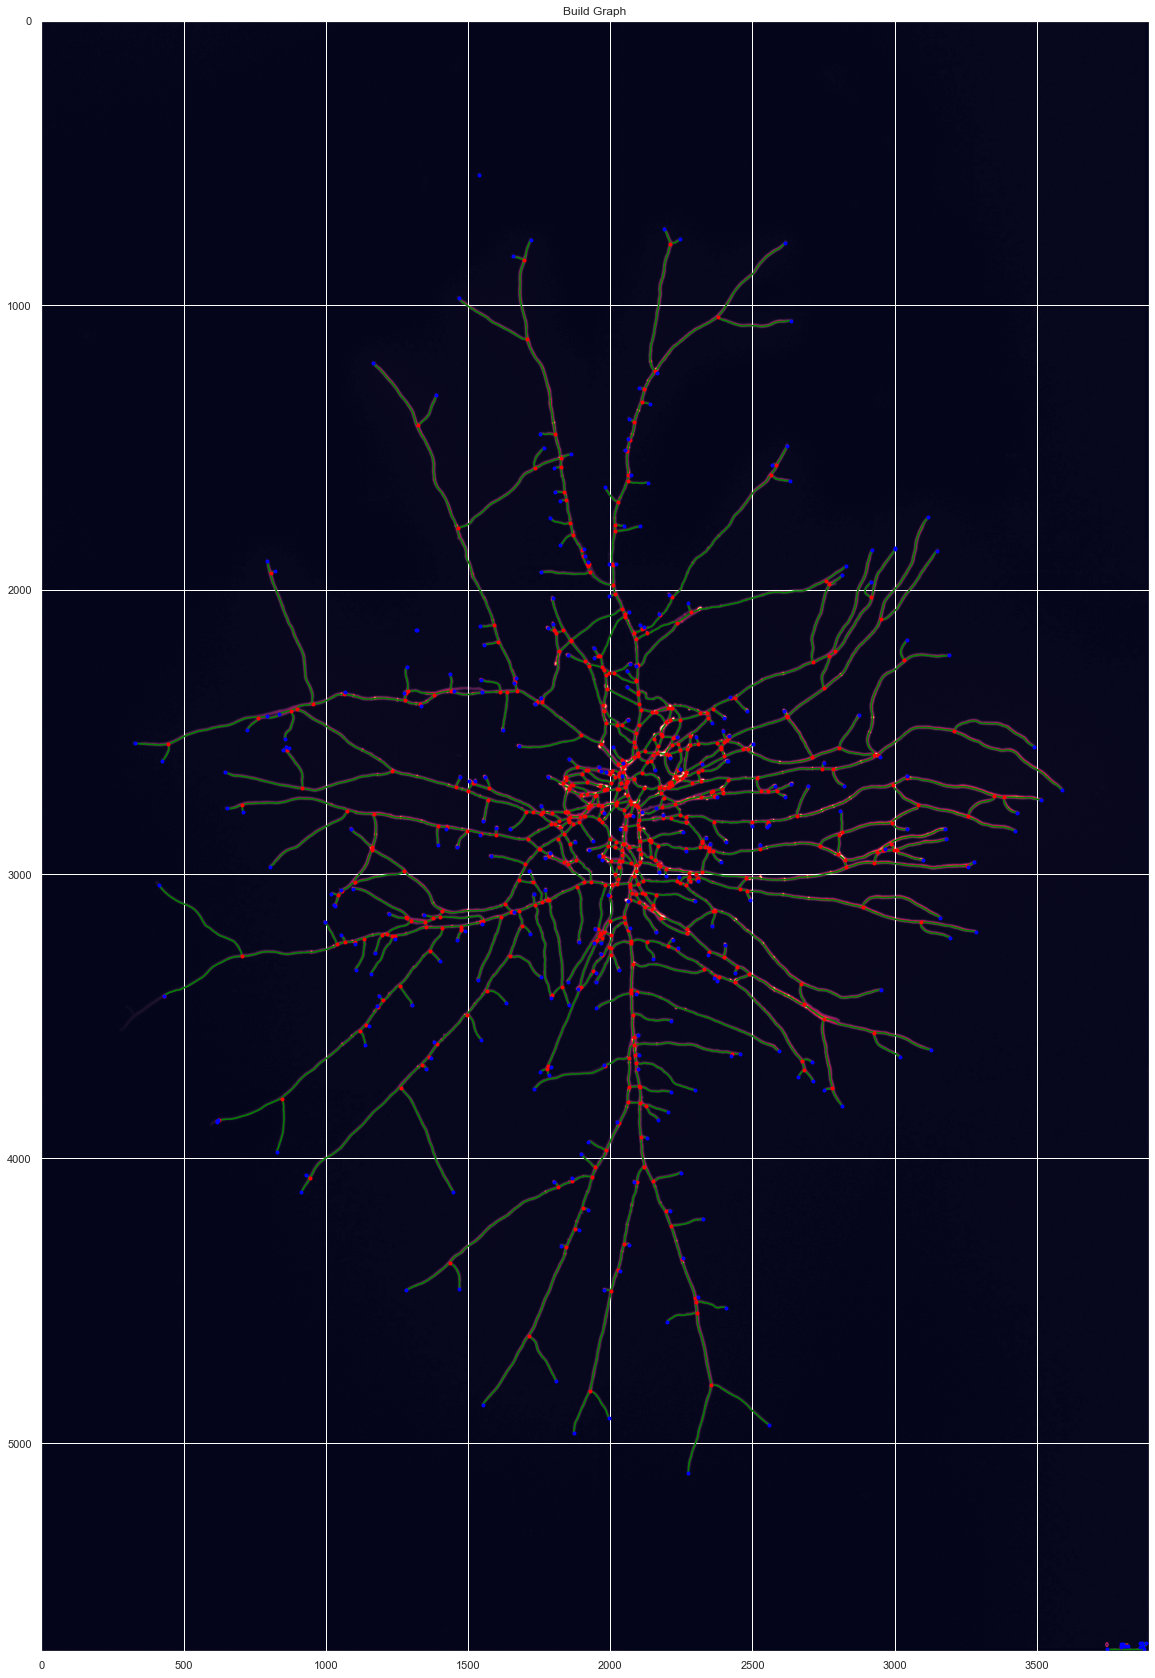

In [13]:
import sknw

# build graph from skeleton
graph = sknw.build_sknw(skeleton)

plt.figure(figsize=[30,30])

# draw image
plt.imshow(img_gray)

# draw edges by pts
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green')
    
# draw node by o
nodes = graph.nodes()
bs = np.array([nodes[i]['o'] for i in nodes if len(graph.edges(i))>=3])
ts = np.array([nodes[i]['o'] for i in nodes if len(graph.edges(i))<=2])
plt.plot(bs[:,1], bs[:,0], 'r.')
plt.plot(ts[:,1], ts[:,0], 'b.')

# title and show
plt.title('Build Graph')
plt.show()